# Traffic Data, Channel 13 (loop) and 54 (pod), Westbound Thru Lane A

## Import Packages, CSV files

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [2]:
# Import data file and pod channels file
data = pd.read_csv('H:/TrafficResearch/ECON_192.168.0.10_2019_03_07_1500.csv', header=0, skiprows=range(1,8))
pod_channels = pd.read_excel('H:/TrafficResearch/Pod_Channels.xlsx', header=1, na_filter=False)

In [3]:
# Display both dataframes
display(data.head(20))
display(pod_channels)

,Timestamp,Event Type,Parameter
0,3/7/2019 15:00:00.0,81,28
1,3/7/2019 15:00:00.0,150,5
2,3/7/2019 15:00:00.1,81,35
3,3/7/2019 15:00:00.2,81,26
4,3/7/2019 15:00:00.3,81,60
5,3/7/2019 15:00:01.9,81,33
6,3/7/2019 15:00:02.5,82,53
7,3/7/2019 15:00:02.5,82,54
8,3/7/2019 15:00:02.6,82,13
9,3/7/2019 15:00:02.6,82,15


,NDOT Ref #,Direction,Lane,Phase,Loops,Loop#/Channel,POD Output,Unnamed: 7,POD 1,POD 3,POD 4,POD 5,POD 6,POD 7,POD 8
0,7,W,A,2,"2,3,4",13,54,,,18519010009224,,1851901000924B,,19029010009272,
1,,W,A,2,"2,3,4",13,53,,,18519010009224,1851901000923E,1851901000924B,18519010009268,19029010009272,
2,15,W,A,2,5,29,58,,,,,,,,1851901000926D
3,20,W,A,2,1,34,61,,190290100092B6,,,,,,
4,8,W,B,2,"2,3,4",14,52,,,190290100092B2,,190290100092B3,,190290100092C0,
5,,W,B,2,"2,3,4",14,51,,,190290100092B2,190290100092B1,190290100092B3,1902901000929F,190290100092C0,
6,18,W,B,2,5,32,57,,,,,,,,18519010009263
7,21,W,B,2,1,35,60,,1851901000921F,,,,,,
8,6,W,L,5,"2,3,4",10,56,,,1851901000925D,,1902901000927C,,19029010009285,
9,,W,L,5,"2,3,4",10,55,,,1851901000925D,1851901000925B,1902901000927C,19029010009292,19029010009285,


In [4]:
# Fix timestamps to be in proper format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format="%m/%d/%Y %H:%M:%S.%f")
display(data.head())

,Timestamp,Event Type,Parameter
0,2019-03-07 15:00:00.000,81,28
1,2019-03-07 15:00:00.000,150,5
2,2019-03-07 15:00:00.100,81,35
3,2019-03-07 15:00:00.200,81,26
4,2019-03-07 15:00:00.300,81,60


## Limit CSV files to detector events, with channels 13 and 54

In [5]:
# Find only Event types 81-100, and Parameters of either 13 or 54
data = data.loc[data['Event Type'].isin(range(81,100))]
data = data.loc[data['Parameter'].isin([13, 54])]

In [6]:
# Display parsed dataframe
display(data.head(20))
print('Number of events for channels 13 and 54: ' + str(len(data.index)))

,Timestamp,Event Type,Parameter
7,2019-03-07 15:00:02.500,82,54
8,2019-03-07 15:00:02.600,82,13
13,2019-03-07 15:00:03.300,81,13
15,2019-03-07 15:00:03.500,81,54
81,2019-03-07 15:00:17.000,82,13
84,2019-03-07 15:00:17.000,82,54
97,2019-03-07 15:00:17.700,81,13
101,2019-03-07 15:00:17.900,81,54
137,2019-03-07 15:00:25.300,82,13
140,2019-03-07 15:00:25.300,82,54


Number of events for channels 13 and 54: 194


## On/Off Plots, Loop/Pod Error Detection

In [7]:
# Create separate dataframes for loop and pod, for plotting purposes
loop_data = data.loc[data['Parameter'].isin([13])]
pod_data = data.loc[data['Parameter'].isin([54])]

# Replace numeric values with Categories
loop_data['Event Type'].replace({82: 'Loop On', 81:'Loop Off'}, inplace=True)
pod_data['Event Type'].replace({82: 'Pod On', 81:'Pod Off'}, inplace=True)

# Display result
display(loop_data.head())
display(pod_data.head())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Timestamp,Event Type,Parameter
8,2019-03-07 15:00:02.600,Loop On,13
13,2019-03-07 15:00:03.300,Loop Off,13
81,2019-03-07 15:00:17.000,Loop On,13
97,2019-03-07 15:00:17.700,Loop Off,13
137,2019-03-07 15:00:25.300,Loop On,13


,Timestamp,Event Type,Parameter
7,2019-03-07 15:00:02.500,Pod On,54
15,2019-03-07 15:00:03.500,Pod Off,54
84,2019-03-07 15:00:17.000,Pod On,54
101,2019-03-07 15:00:17.900,Pod Off,54
140,2019-03-07 15:00:25.300,Pod On,54


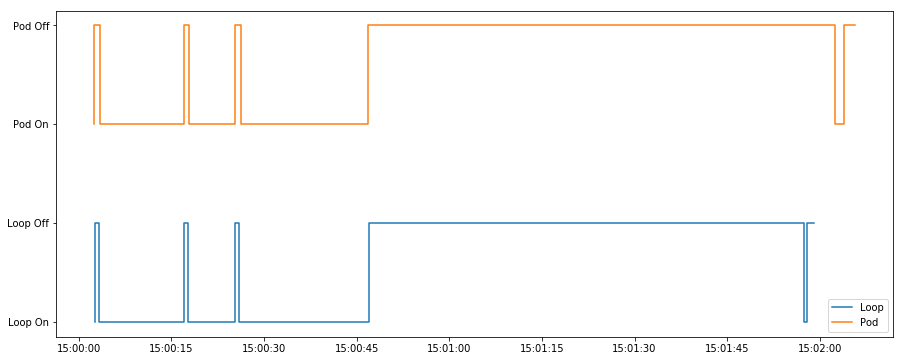

In [8]:
# Plot On/Off for head of each dataset
plt.figure(figsize=[15, 6])

plt.step(loop_data['Timestamp'].head(10), loop_data['Event Type'].head(10), label='Loop')

plt.step(pod_data['Timestamp'].head(10), pod_data['Event Type'].head(10), label='Pod')

plt.legend()

plt.show()

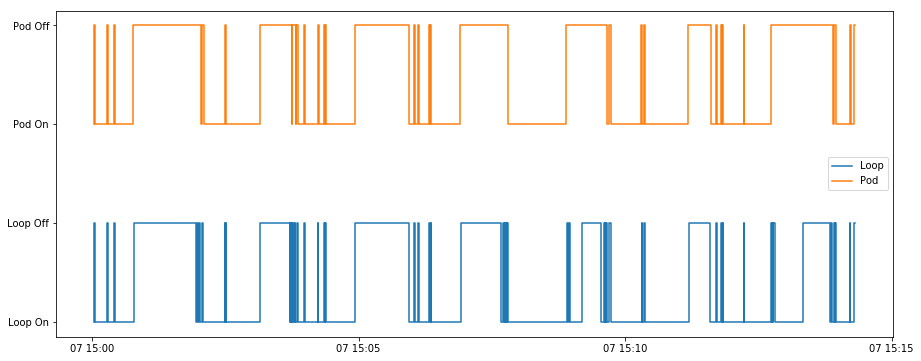

In [9]:
# Plot On/Off for entire dataset
plt.figure(figsize=[15, 6])

plt.step(loop_data['Timestamp'], loop_data['Event Type'], label='Loop')

plt.step(pod_data['Timestamp'], pod_data['Event Type'], label='Pod')

plt.legend()

plt.show()

In [10]:
# Copy data and create offset columns for each of original columns
data_test = data.copy()
display(data_test.head())

# Shift each one down by negative 1
data_test['Next Timestamp'] = data_test['Timestamp'].shift(-1)
data_test['Next Event Type'] = data_test['Event Type'].shift(-1).fillna(0).astype(int)
data_test['Next Parameter'] = data_test['Parameter'].shift(-1).fillna(0).astype(int)
display(data_test.head())

,Timestamp,Event Type,Parameter
7,2019-03-07 15:00:02.500,82,54
8,2019-03-07 15:00:02.600,82,13
13,2019-03-07 15:00:03.300,81,13
15,2019-03-07 15:00:03.500,81,54
81,2019-03-07 15:00:17.000,82,13


,Timestamp,Event Type,Parameter,Next Timestamp,Next Event Type,Next Parameter
7,2019-03-07 15:00:02.500,82,54,2019-03-07 15:00:02.600,82,13
8,2019-03-07 15:00:02.600,82,13,2019-03-07 15:00:03.300,81,13
13,2019-03-07 15:00:03.300,81,13,2019-03-07 15:00:03.500,81,54
15,2019-03-07 15:00:03.500,81,54,2019-03-07 15:00:17.000,82,13
81,2019-03-07 15:00:17.000,82,13,2019-03-07 15:00:17.000,82,54


In [11]:
%%time

errors = pd.DataFrame(columns=['Start Time', 'Duration', 'Error Type'])

for index, row in data_test.iterrows():
    
    if index == data_test.shape[0]-1:
        break
    
    new_row = []
    
    # L1V0 positive activation
    if (row['Parameter'] == 13) and (row['Event Type'] == 82):
        
        start_time = row['Timestamp']
        
        if (row['Next Parameter'] == 54) and (row['Next Event Type'] == 82):
            
            duration = row['Next Timestamp'] - start_time
            error_type = 'L1V0'
            
    # L0V1 negative activation
    elif (row['Parameter'] == 54) and (row['Event Type'] == 82):
        
        start_time = row['Timestamp']
        
        if (row['Next Parameter'] == 13) and (row['Next Event Type'] == 82):
            
            duration = row['Next Timestamp'] - start_time
            error_type = 'L0V1'
            
    # L0V1 positive termination
    elif (row['Parameter'] == 13) and (row['Event Type'] == 81):
        
        start_time = row['Timestamp']
        
        if (row['Next Parameter'] == 54) and (row['Next Event Type'] == 81):
            
            duration = row['Next Timestamp'] - start_time
            error_type = 'L0V1'
            
    # L1V0 negative termination
    elif (row['Parameter'] == 54) and (row['Event Type'] == 81):
        
        start_time = row['Timestamp']
        
        if (row['Next Parameter'] == 13) and (row['Next Event Type'] == 81):
            
            duration = row['Next Timestamp'] - start_time
            error_type = 'L1V0'
            
    #print(start_time, duration, error_type)
    new_row = pd.Series([start_time, duration.total_seconds(), error_type], index=errors.columns)
    #print(new_row)
    errors = errors.append(new_row, ignore_index=True)
    #errors.append({'Start Time': start_time, 'Duration': duration, 'Error Type': error_type}, ignore_index=True)
        
display(errors)

,Start Time,Duration,Error Type
0,2019-03-07 15:00:02.500,0.1,L0V1
1,2019-03-07 15:00:02.600,0.1,L0V1
2,2019-03-07 15:00:03.300,0.2,L0V1
3,2019-03-07 15:00:03.500,0.2,L0V1
4,2019-03-07 15:00:17.000,0.0,L1V0
5,2019-03-07 15:00:17.000,0.0,L1V0
6,2019-03-07 15:00:17.700,0.2,L0V1
7,2019-03-07 15:00:17.900,0.2,L0V1
8,2019-03-07 15:00:25.300,0.0,L1V0
9,2019-03-07 15:00:25.300,0.0,L1V0


Wall time: 178 ms


In [12]:
errors['Error Type'].value_counts()

L0V1    140
L1V0     54
Name: Error Type, dtype: int64

['b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'r', 'r', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']


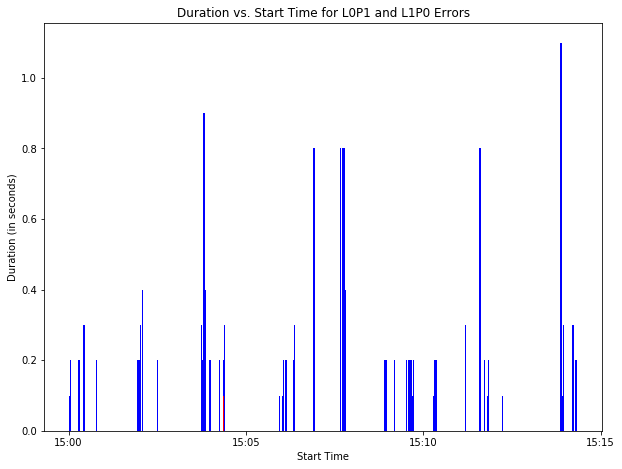

In [13]:
colors = []
for index, row in errors.iterrows():
    #print(row['Error Type'])
    
    if row['Error Type'] == 'L0V1':
        colors.append('b')
    else:
        colors.append('r')
        
print(colors)

plt.figure(figsize=[10, 7.5])
plt.bar(list(errors['Start Time']), list(errors['Duration']), width=2./24/60/60, color=colors)
plt.gca().xaxis.set_major_formatter(DateFormatter("%H:%M"))

plt.title('Duration vs. Start Time for L0P1 and L1P0 Errors')
plt.xlabel('Start Time')
plt.ylabel('Duration (in seconds)')
 
plt.show()

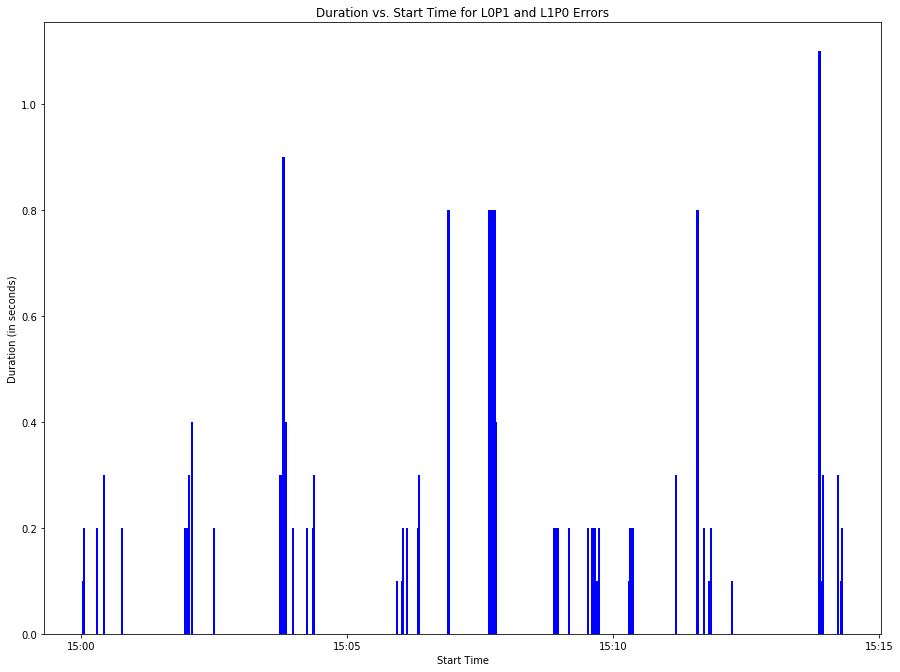

In [14]:
plt.figure(figsize=[15, 11.25])
plt.bar(list(errors['Start Time']), list(errors['Duration']), width=2./24/60/60, color=colors)
plt.gca().xaxis.set_major_formatter(DateFormatter("%H:%M"))

plt.title('Duration vs. Start Time for L0P1 and L1P0 Errors')
plt.xlabel('Start Time')
plt.ylabel('Duration (in seconds)')
 
plt.show()

# Traffic Data, Combined Loop/Pod Combinations

## Import Packages, CSV Files

In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math

In [16]:
# Import data file and pod channels file
data = pd.read_csv('H:/TrafficResearch/ECON_192.168.0.10_2019_03_07_1500.csv', header=0, skiprows=range(1,8))
pod_channels = pd.read_excel('H:/TrafficResearch/Pod_Channels.xlsx', header=1, na_filter=False)

In [17]:
# Display both dataframes
display(data.head(20))
display(pod_channels)

,Timestamp,Event Type,Parameter
0,3/7/2019 15:00:00.0,81,28
1,3/7/2019 15:00:00.0,150,5
2,3/7/2019 15:00:00.1,81,35
3,3/7/2019 15:00:00.2,81,26
4,3/7/2019 15:00:00.3,81,60
5,3/7/2019 15:00:01.9,81,33
6,3/7/2019 15:00:02.5,82,53
7,3/7/2019 15:00:02.5,82,54
8,3/7/2019 15:00:02.6,82,13
9,3/7/2019 15:00:02.6,82,15


,NDOT Ref #,Direction,Lane,Phase,Loops,Loop#/Channel,POD Output,Unnamed: 7,POD 1,POD 3,POD 4,POD 5,POD 6,POD 7,POD 8
0,7,W,A,2,"2,3,4",13,54,,,18519010009224,,1851901000924B,,19029010009272,
1,,W,A,2,"2,3,4",13,53,,,18519010009224,1851901000923E,1851901000924B,18519010009268,19029010009272,
2,15,W,A,2,5,29,58,,,,,,,,1851901000926D
3,20,W,A,2,1,34,61,,190290100092B6,,,,,,
4,8,W,B,2,"2,3,4",14,52,,,190290100092B2,,190290100092B3,,190290100092C0,
5,,W,B,2,"2,3,4",14,51,,,190290100092B2,190290100092B1,190290100092B3,1902901000929F,190290100092C0,
6,18,W,B,2,5,32,57,,,,,,,,18519010009263
7,21,W,B,2,1,35,60,,1851901000921F,,,,,,
8,6,W,L,5,"2,3,4",10,56,,,1851901000925D,,1902901000927C,,19029010009285,
9,,W,L,5,"2,3,4",10,55,,,1851901000925D,1851901000925B,1902901000927C,19029010009292,19029010009285,


In [18]:
# Fix timestamps to be in proper format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format="%m/%d/%Y %H:%M:%S.%f")
display(data.head())

,Timestamp,Event Type,Parameter
0,2019-03-07 15:00:00.000,81,28
1,2019-03-07 15:00:00.000,150,5
2,2019-03-07 15:00:00.100,81,35
3,2019-03-07 15:00:00.200,81,26
4,2019-03-07 15:00:00.300,81,60


In [19]:
# Value counts for Event Type
print(data['Event Type'].value_counts())

82     1800
81     1799
2       424
43      287
44      284
49       54
9        51
7        51
8        51
10       51
1        50
0        50
47       50
12       50
11       50
3        49
48       49
46       45
4        29
6        22
150      16
151      16
31       15
Name: Event Type, dtype: int64


## Limit CSV files to detector events, but keep all channels

In [20]:
# Find only Event types 81-100, and Parameters of either 13 or 54
data = data.loc[data['Event Type'].isin(range(81,100))]

In [21]:
# Display parsed dataframe
display(data.head(20))
print('Number of events for all channels: ' + str(len(data.index)))

,Timestamp,Event Type,Parameter
0,2019-03-07 15:00:00.000,81,28
2,2019-03-07 15:00:00.100,81,35
3,2019-03-07 15:00:00.200,81,26
4,2019-03-07 15:00:00.300,81,60
5,2019-03-07 15:00:01.900,81,33
6,2019-03-07 15:00:02.500,82,53
7,2019-03-07 15:00:02.500,82,54
8,2019-03-07 15:00:02.600,82,13
9,2019-03-07 15:00:02.600,82,15
10,2019-03-07 15:00:02.700,81,15


Number of events for all channels: 3599


## Loop/Pod Error Detection

In [22]:
def gen_errors(loop_ch, pod_ch, df):
    # Copy data and create offset columns for each of original columns
    df_test = df.copy()
    df_test = df_test.loc[df_test['Parameter'].isin([loop_ch, pod_ch])]
    #display(df_test.head())
    
    # Shift each one down by negative 1
    df_test['Next Timestamp'] = df_test['Timestamp'].shift(-1)
    df_test['Next Event Type'] = df_test['Event Type'].shift(-1).fillna(0).astype(int)
    df_test['Next Parameter'] = df_test['Parameter'].shift(-1).fillna(0).astype(int)
    #display(df_test.head())
    
    errors = pd.DataFrame(columns=['Start Time', 'Duration', 'Error Type'])

    for index, row in df_test.iterrows():

        if index == df_test.shape[0]-1:
            break

        new_row = []

        # L1V0 positive activation
        if (row['Parameter'] == loop_ch) and (row['Event Type'] == 82):

            start_time = row['Timestamp']

            if (row['Next Parameter'] == pod_ch) and (row['Next Event Type'] == 82):

                duration = row['Next Timestamp'] - start_time
                error_type = 'L1P0'

        # L0V1 negative activation
        elif (row['Parameter'] == pod_ch) and (row['Event Type'] == 82):

            start_time = row['Timestamp']

            if (row['Next Parameter'] == loop_ch) and (row['Next Event Type'] == 82):

                duration = row['Next Timestamp'] - start_time
                error_type = 'L0P1'

        # L0V1 positive termination
        elif (row['Parameter'] == loop_ch) and (row['Event Type'] == 81):

            start_time = row['Timestamp']

            if (row['Next Parameter'] == pod_ch) and (row['Next Event Type'] == 81):

                duration = row['Next Timestamp'] - start_time
                error_type = 'L0P1'

        # L1V0 negative termination
        elif (row['Parameter'] == pod_ch) and (row['Event Type'] == 81):

            start_time = row['Timestamp']

            if (row['Next Parameter'] == loop_ch) and (row['Next Event Type'] == 81):

                duration = row['Next Timestamp'] - start_time
                error_type = 'L1P0'

        #print(start_time, duration, error_type)
        new_row = pd.Series([start_time, duration.total_seconds(), error_type], index=errors.columns)
        #print(new_row)
        errors = errors.append(new_row, ignore_index=True)
        #errors.append({'Start Time': start_time, 'Duration': duration, 'Error Type': error_type}, ignore_index=True)
        
    return errors

In [23]:
errors2 = gen_errors(13, 54, data)

In [24]:
errors2['Error Type'].value_counts()

L0P1    140
L1P0     54
Name: Error Type, dtype: int64

['b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'r', 'r', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


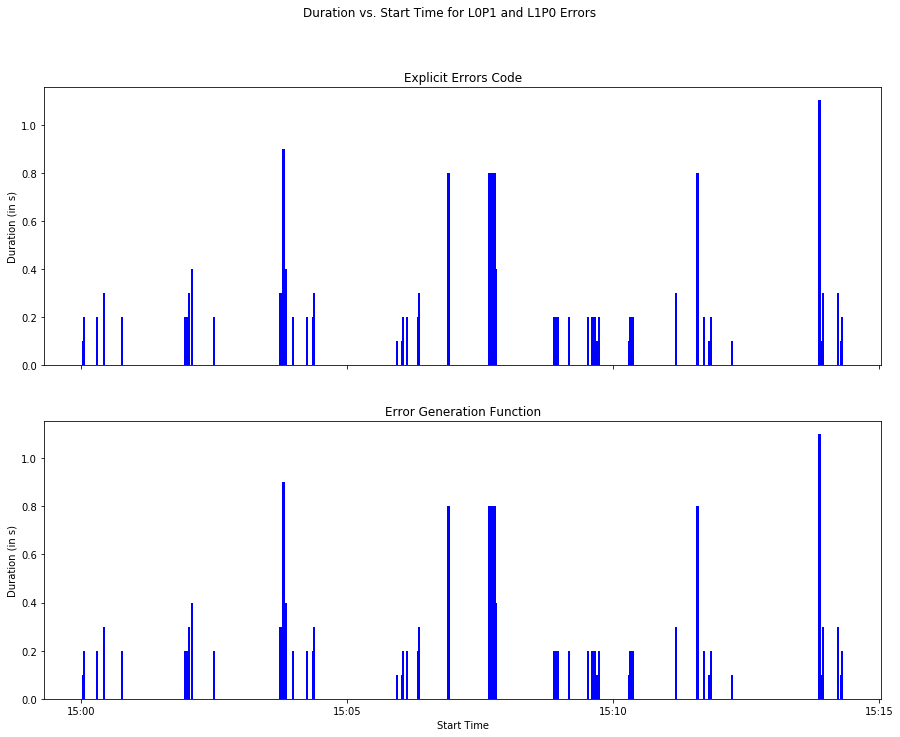

In [25]:
colors = []
for index, row in errors.iterrows():
    #print(row['Error Type'])
    
    if row['Error Type'] == 'L0V1':
        colors.append('b')
    else:
        colors.append('r')
        
print(colors)

# plt.figure(figsize=[10, 7.5])
# plt.bar(list(errors['Start Time']), list(errors['Duration']), width=2./24/60/60, color=colors)
# plt.gca().xaxis.set_major_formatter(DateFormatter("%H:%M"))

f, axarr = plt.subplots(2, sharex=True, figsize=[15, 11.25])
f.suptitle('Duration vs. Start Time for L0P1 and L1P0 Errors')

axarr[0].bar(list(errors['Start Time']), list(errors['Duration']), width=2./24/60/60, color=colors)
axarr[0].set_title('Explicit Errors Code')

axarr[1].bar(list(errors2['Start Time']), list(errors2['Duration']), width=2./24/60/60, color=colors)
axarr[1].set_title('Error Generation Function')
axarr[1].set_xlabel('Start Time')

f.gca().xaxis.set_major_formatter(DateFormatter("%H:%M"))

# f.title('Duration vs. Start Time for L0P1 and L1P0 Errors')
for ax in axarr:
    ax.set_ylabel('Duration (in s)')
 
f.show()

## Putting it all together in a loop

Wall time: 1.61 s


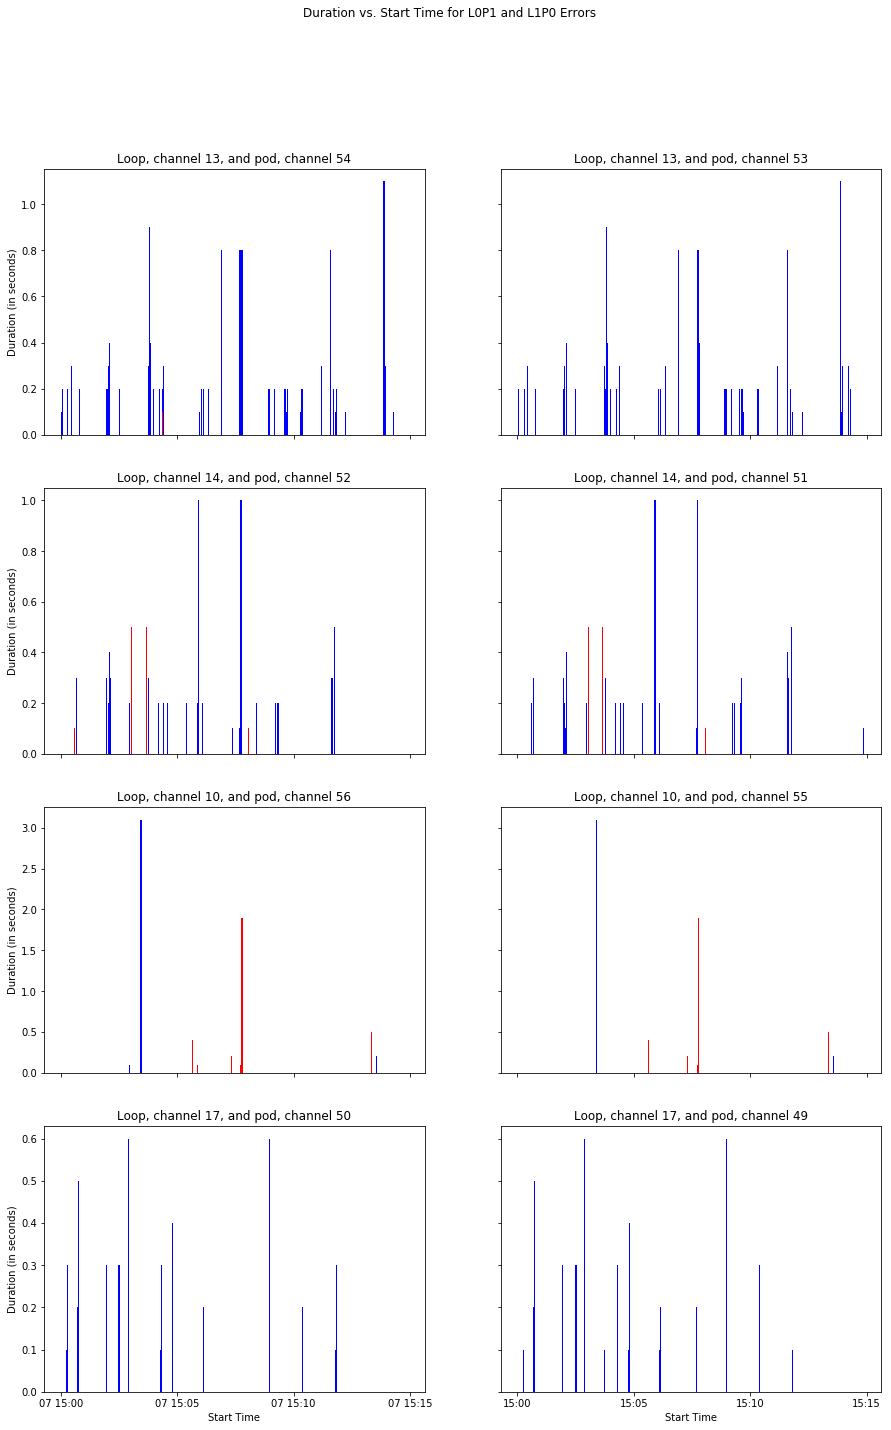

In [38]:
%%time

# First, create a list of paired loop, pods
list_of_looppod_pairs = [[13,54], [13, 53], [14, 52], [14, 51], [10, 56], [10, 55], [17, 50], [17, 49]]

f, axarr = plt.subplots(4, 2, sharex='col', sharey='row', figsize=[15, 11.25*2])
f.suptitle('Duration vs. Start Time for L0P1 and L1P0 Errors')

for i in range(len(list_of_looppod_pairs)):
    pair = list_of_looppod_pairs[i]
    errors = gen_errors(pair[0], pair[1], data)
    
    colors = []
    
    for index, row in errors.iterrows():
        if row['Error Type'] == 'L0P1':
            colors.append('b')
        else:
            colors.append('r')

    #print(colors)

    axarr[i - math.ceil(i/2), i % 2].bar(list(errors['Start Time']), list(errors['Duration']), width=2./24/60/60, color=colors)
    axarr[i - math.ceil(i/2), i % 2].set_title('Loop, channel '+str(pair[0])+', and pod, channel '+str(pair[1]))

f.gca().xaxis.set_major_formatter(DateFormatter("%H:%M"))
for ax in axarr.flat:
    ax.set(xlabel='Start Time', ylabel='Duration (in seconds)')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axarr.flat:
    ax.label_outer()

f.show()
f.savefig('errors.svg', format='svg')

# Traffic Data, Combined Loop/Pod Combinations, Duplication Fixing (4/16/19)

## Import Packages, CSV Files

In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import datetime

In [37]:
# Import data file and pod channels file
data = pd.read_csv('H:/TrafficResearch/ECON_192.168.0.10_2019_03_07_1500.csv', header=0, skiprows=range(1,8))
pod_channels = pd.read_excel('H:/TrafficResearch/Pod_Channels.xlsx', header=1, na_filter=False)

In [38]:
# Display both dataframes
display(data.head(20))
display(pod_channels)

,Timestamp,Event Type,Parameter
0,3/7/2019 15:00:00.0,81,28
1,3/7/2019 15:00:00.0,150,5
2,3/7/2019 15:00:00.1,81,35
3,3/7/2019 15:00:00.2,81,26
4,3/7/2019 15:00:00.3,81,60
5,3/7/2019 15:00:01.9,81,33
6,3/7/2019 15:00:02.5,82,53
7,3/7/2019 15:00:02.5,82,54
8,3/7/2019 15:00:02.6,82,13
9,3/7/2019 15:00:02.6,82,15


,NDOT Ref #,Direction,Lane,Phase,Loops,Loop#/Channel,POD Output,Unnamed: 7,POD 1,POD 3,POD 4,POD 5,POD 6,POD 7,POD 8
0,7,W,A,2,"2,3,4",13,54,,,18519010009224,,1851901000924B,,19029010009272,
1,,W,A,2,"2,3,4",13,53,,,18519010009224,1851901000923E,1851901000924B,18519010009268,19029010009272,
2,15,W,A,2,5,29,58,,,,,,,,1851901000926D
3,20,W,A,2,1,34,61,,190290100092B6,,,,,,
4,8,W,B,2,"2,3,4",14,52,,,190290100092B2,,190290100092B3,,190290100092C0,
5,,W,B,2,"2,3,4",14,51,,,190290100092B2,190290100092B1,190290100092B3,1902901000929F,190290100092C0,
6,18,W,B,2,5,32,57,,,,,,,,18519010009263
7,21,W,B,2,1,35,60,,1851901000921F,,,,,,
8,6,W,L,5,"2,3,4",10,56,,,1851901000925D,,1902901000927C,,19029010009285,
9,,W,L,5,"2,3,4",10,55,,,1851901000925D,1851901000925B,1902901000927C,19029010009292,19029010009285,


In [39]:
# Fix timestamps to be in proper format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format="%m/%d/%Y %H:%M:%S.%f")
display(data.head())

,Timestamp,Event Type,Parameter
0,2019-03-07 15:00:00.000,81,28
1,2019-03-07 15:00:00.000,150,5
2,2019-03-07 15:00:00.100,81,35
3,2019-03-07 15:00:00.200,81,26
4,2019-03-07 15:00:00.300,81,60


In [40]:
# Value counts for Event Type
print(data['Event Type'].value_counts())

82     1800
81     1799
2       424
43      287
44      284
49       54
9        51
7        51
8        51
10       51
1        50
0        50
47       50
12       50
11       50
3        49
48       49
46       45
4        29
6        22
150      16
151      16
31       15
Name: Event Type, dtype: int64


## Limit CSV files to detector events, but keep all channels

In [41]:
# Find only Event types 81-100, and Parameters of either 13 or 54
data = data.loc[data['Event Type'].isin(range(81,100))]

In [42]:
# Display parsed dataframe
display(data.head(20))
print('Number of events for all channels: ' + str(len(data.index)))

,Timestamp,Event Type,Parameter
0,2019-03-07 15:00:00.000,81,28
2,2019-03-07 15:00:00.100,81,35
3,2019-03-07 15:00:00.200,81,26
4,2019-03-07 15:00:00.300,81,60
5,2019-03-07 15:00:01.900,81,33
6,2019-03-07 15:00:02.500,82,53
7,2019-03-07 15:00:02.500,82,54
8,2019-03-07 15:00:02.600,82,13
9,2019-03-07 15:00:02.600,82,15
10,2019-03-07 15:00:02.700,81,15


Number of events for all channels: 3599


## Loop/Pod Error Detection

In [45]:
def gen_errors(loop_ch, pod_ch, df):
    # Copy data and create offset columns for each of original columns
    df_test = df.copy()
    df_test = df_test.loc[df_test['Parameter'].isin([loop_ch, pod_ch])]
    #display(df_test.head())
    
    # Shift each one down by negative 1
    df_test['Next Timestamp'] = df_test['Timestamp'].shift(-1)
    df_test['Next Event Type'] = df_test['Event Type'].shift(-1).fillna(0).astype(int)
    df_test['Next Parameter'] = df_test['Parameter'].shift(-1).fillna(0).astype(int)
    #display(df_test.head())
    
    errors = pd.DataFrame(columns=['Start Time', 'Duration', 'Error Type'])

    for index, row in df_test.iterrows():
        
        duration = datetime.timedelta(0)
        error_type = ''

        if index == df_test.shape[0]-1:
            break

        new_row = []

        # L1V0 positive activation
        if (row['Parameter'] == loop_ch) and (row['Event Type'] == 82):

            start_time = row['Timestamp']

            if (row['Next Parameter'] == pod_ch) and (row['Next Event Type'] == 82):

                duration = row['Next Timestamp'] - start_time
                error_type = 'L1P0'

        # L0V1 negative activation
        elif (row['Parameter'] == pod_ch) and (row['Event Type'] == 82):

            start_time = row['Timestamp']

            if (row['Next Parameter'] == loop_ch) and (row['Next Event Type'] == 82):

                duration = row['Next Timestamp'] - start_time
                error_type = 'L0P1'

        # L0V1 positive termination
        elif (row['Parameter'] == loop_ch) and (row['Event Type'] == 81):

            start_time = row['Timestamp']

            if (row['Next Parameter'] == pod_ch) and (row['Next Event Type'] == 81):

                duration = row['Next Timestamp'] - start_time
                error_type = 'L0P1'

        # L1V0 negative termination
        elif (row['Parameter'] == pod_ch) and (row['Event Type'] == 81):

            start_time = row['Timestamp']

            if (row['Next Parameter'] == loop_ch) and (row['Next Event Type'] == 81):

                duration = row['Next Timestamp'] - start_time
                error_type = 'L1P0'

        if duration.total_seconds() != 0:
        
            #print(start_time, duration, error_type)
            new_row = pd.Series([start_time, duration.total_seconds(), error_type], index=errors.columns)
            #print(new_row)
            errors = errors.append(new_row, ignore_index=True)
            #errors.append({'Start Time': start_time, 'Duration': duration, 'Error Type': error_type}, ignore_index=True)
            
        else:
            pass
        
    return errors

In [46]:
errors2 = gen_errors(13, 54, data)

In [47]:
display(errors2)

,Start Time,Duration,Error Type
0,2019-03-07 15:00:02.500,0.1,L0P1
1,2019-03-07 15:00:03.300,0.2,L0P1
2,2019-03-07 15:00:17.700,0.2,L0P1
3,2019-03-07 15:00:26.000,0.3,L0P1
4,2019-03-07 15:00:46.800,0.2,L0P1
5,2019-03-07 15:02:02.100,0.3,L0P1
6,2019-03-07 15:02:05.300,0.4,L0P1
7,2019-03-07 15:02:29.900,0.1,L1P0
8,2019-03-07 15:02:30.600,0.2,L0P1
9,2019-03-07 15:03:45.100,0.3,L0P1


In [48]:
errors2['Error Type'].value_counts()

L0P1    48
L1P0     3
Name: Error Type, dtype: int64

['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']


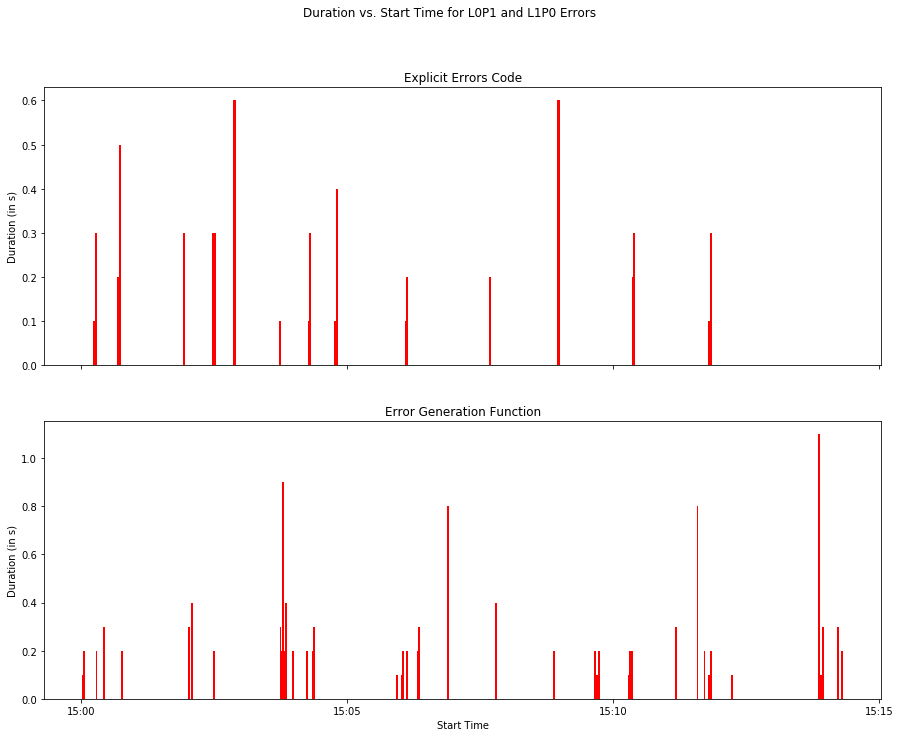

In [49]:
colors = []
for index, row in errors2.iterrows():
    #print(row['Error Type'])
    
    if row['Error Type'] == 'L0V1':
        colors.append('b')
    else:
        colors.append('r')
        
print(colors)

# plt.figure(figsize=[10, 7.5])
# plt.bar(list(errors['Start Time']), list(errors['Duration']), width=2./24/60/60, color=colors)
# plt.gca().xaxis.set_major_formatter(DateFormatter("%H:%M"))

f, axarr = plt.subplots(2, sharex=True, figsize=[15, 11.25])
f.suptitle('Duration vs. Start Time for L0P1 and L1P0 Errors')

axarr[0].bar(list(errors['Start Time']), list(errors['Duration']), width=2./24/60/60, color=colors)
axarr[0].set_title('Explicit Errors Code')

axarr[1].bar(list(errors2['Start Time']), list(errors2['Duration']), width=2./24/60/60, color=colors)
axarr[1].set_title('Error Generation Function')
axarr[1].set_xlabel('Start Time')

f.gca().xaxis.set_major_formatter(DateFormatter("%H:%M"))

# f.title('Duration vs. Start Time for L0P1 and L1P0 Errors')
for ax in axarr:
    ax.set_ylabel('Duration (in s)')
 
f.show()

## Putting it all together in a loop

Wall time: 780 ms


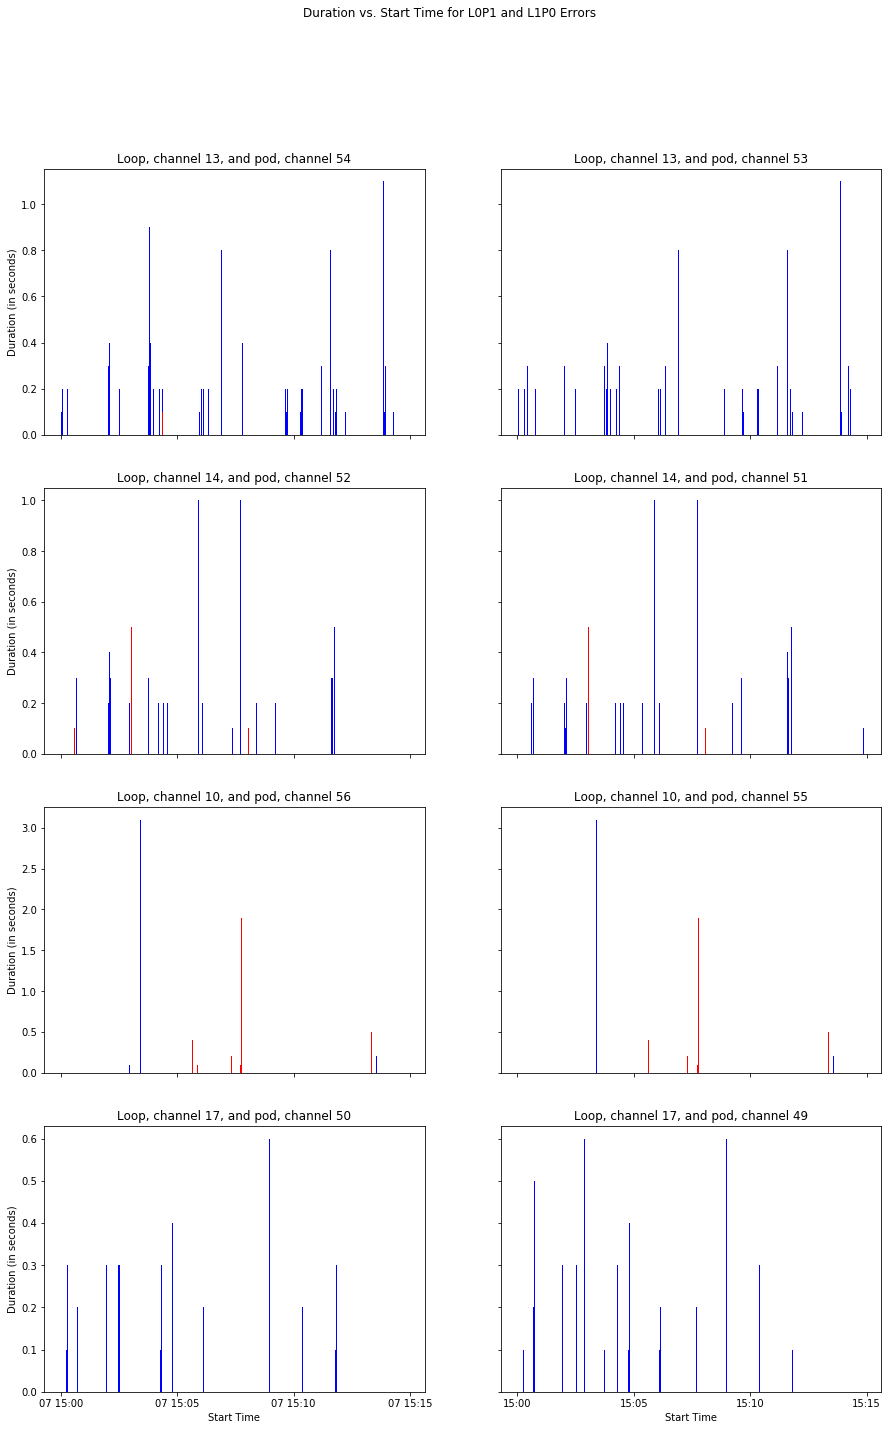

In [52]:
%%time

# First, create a list of paired loop, pods
list_of_looppod_pairs = [[13,54], [13, 53], [14, 52], [14, 51], [10, 56], [10, 55], [17, 50], [17, 49]]

f, axarr = plt.subplots(4, 2, sharex='col', sharey='row', figsize=[15, 11.25*2])
f.suptitle('Duration vs. Start Time for L0P1 and L1P0 Errors')

for i in range(len(list_of_looppod_pairs)):
    pair = list_of_looppod_pairs[i]
    errors = gen_errors(pair[0], pair[1], data)
    
    colors = []
    
    for index, row in errors.iterrows():
        if row['Error Type'] == 'L0P1':
            colors.append('b')
        else:
            colors.append('r')

    #print(colors)

    axarr[i - math.ceil(i/2), i % 2].bar(list(errors['Start Time']), list(errors['Duration']), width=2./24/60/60, color=colors)
    axarr[i - math.ceil(i/2), i % 2].set_title('Loop, channel '+str(pair[0])+', and pod, channel '+str(pair[1]))

f.gca().xaxis.set_major_formatter(DateFormatter("%H:%M"))
for ax in axarr.flat:
    ax.set(xlabel='Start Time', ylabel='Duration (in seconds)')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axarr.flat:
    ax.label_outer()

f.show()
f.savefig('errors.svg', format='svg')